<h2 align='center'><a> Understanding the business problem</h2>

In [1]:
###BUSINESS CONTEXT:
# This case requires trainees to develop a customer segmentation to define marketing strategy. The
# sample dataset summarizes the usage behavior of about 9000 active credit card holders during the
# last 6 months. The file is at a customer level with 18 behavioral variables. Expectations from the

###EXPECTATIONS FROM THE TRAINEES:
# Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs
# such as:
#  Monthly average purchase and cash advance amount
#  Purchases by type (one-off, installments)
#  Average amount per purchase and cash advance transaction,
#  Limit usage (balance to credit limit ratio),
#  Payments to minimum payments ratio etc.
#  Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
#  Identification of the relationships/ affinities between services.
#  Clustering: Apply a data reduction technique factor analysis for variable reduction technique
# and a clustering algorithm to reveal the behavioural segments of credit card holders
#  Identify cluster characterisitics of the cluster using detailed profiling.
#  Provide the strategic insights and implementation of strategies for given set of cluster
# characteristics

#### <a>Importing the necessary library.

In [2]:
import pandas as pd             
import numpy as np              

import seaborn as sns           

import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
          
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

<h2 align='center'><a>Exploratory Data Analysis(EDA)</h2>

#### <a>Import the data

In [3]:
df = pd.read_csv('D:\\Python\\Advance\\4. Segmentation of Credit Card Customers\\CC_GENERAL.csv')  # Reading the dataset

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['CC_GENERAL.csv']))

#### <a>Making friendship with data after importing.

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.shape

(8950, 18)

In [8]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
df.isna().sum()  # Number of missing values in the dataset

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

####  <a>Creating Data audit Report
##### create UDFs

In [10]:
# Use a general function that returns multiple values-

# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                        x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [11]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

#### <a>Data Inspection

In [12]:
# seperate categorical and continuous variables
df_conti_vars = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_cat_vars = df.loc[:, (df.dtypes == 'object')]

In [13]:
#checking P1 & Min(Outliers),P99 & Max(Outliers),Mean Median,NMISS(for missing values).

df_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [14]:
#checking Mode,Freq,NMISS,Percent,Count.

df_cat_vars.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
CUST_ID,8950,0,C12136,1,0.01


<h1 align='center'> <a>Treatment of Data</h1>

In [15]:
## Missing value imputation with Median.
df_conti_vars['CREDIT_LIMIT'].fillna(df_conti_vars['CREDIT_LIMIT'].median(),inplace=True)
df_conti_vars['MINIMUM_PAYMENTS'].fillna(df_conti_vars['MINIMUM_PAYMENTS'].median(),inplace=True)
print(df_conti_vars.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df_conti_vars.apply(continuous_var_summary).T.round(2)  # brief summary of the dataset

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [17]:
## Due to the high cardinality-Neglect the CUST_ID columns and go with continuous variable columns.
dataset = df_conti_vars.copy()

### <a>Driving New Key KPI

**<a>Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs**

#### 1.1.Calculating Monthly average purchase by dividing 

In [18]:
# 'Total purchase amount spent during last 12 months' by 'Number of months as a customer'

dataset['Monthly_avg_purchase'] = dataset['PURCHASES'] / dataset['TENURE']

#### 1.2.Calculating Monthly 'cash advance amount' by dividing

In [19]:
# 'Total cash-advance amount' by 'Number of months as a customer'

dataset['Monthly_cash_advance'] = dataset['CASH_ADVANCE'] / dataset['TENURE']

In [20]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


#### 2. Function for defining purchase type(Purchases by type (one-off, installments))-

In [21]:
# Four types of purchase behaviour - deriving categorical variables based on the behaviour.
# Creating a UDF to create a new KPI 'Purchase_type'

def purchasetype(dataset):
    if ((dataset.ONEOFF_PURCHASES == 0) & (dataset.INSTALLMENTS_PURCHASES == 0)):
        return 'NONE'
    if ((dataset.ONEOFF_PURCHASES > 0) & (dataset.INSTALLMENTS_PURCHASES == 0)):
        return 'ONE_OFF'
    if ((dataset.ONEOFF_PURCHASES > 0) & (dataset.INSTALLMENTS_PURCHASES > 0)):
        return 'BOTH_ONEOFF_INSTALLMENT'
    if ((dataset.ONEOFF_PURCHASES == 0) & (dataset.INSTALLMENTS_PURCHASES > 0)):
        return 'INSTALLMENTS'

In [22]:
dataset['purchase_type'] = dataset.apply(purchasetype, axis = 1)
dataset['purchase_type'].value_counts()

BOTH_ONEOFF_INSTALLMENT    2774
INSTALLMENTS               2260
NONE                       2042
ONE_OFF                    1874
Name: purchase_type, dtype: int64

#### 3.Limit usage (balance to credit limit ratio)

***Lower value implies cutomers are maintaing their balance properly. Lower value means good credit score.***

In [23]:
# limit usage

dataset['limit_usage'] = dataset.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'], axis=1)
dataset['limit_usage']

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: limit_usage, Length: 8950, dtype: float64

#### 4.Payments to minimum payments ratio

In [24]:
# payment to minimum payment ratio
dataset['payment_minpay'] = dataset.apply(lambda x: x['PAYMENTS'] / x['MINIMUM_PAYMENTS'], axis=1)
dataset['payment_minpay']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64

In [25]:
dataset['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

#### <a>Extreme value Treatment
###### Since there are variables having extreme values hence doing log-transformation on the dataset to remove outlier effect-

In [26]:
# log tranformation
df_log=dataset.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [27]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [28]:
##Selecting important features-
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
df_pre=df_log[[x for x in df_log.columns if x not in col ]]

#### <a>Insights of KPI(Advance Reporting)-

In [29]:
# Average 'payment_minpay' ratio for each 'purchse_by_type'.

KPI = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))

In [30]:
KPI

purchase_type
BOTH_ONEOFF_INSTALLMENT     7.236982
INSTALLMENTS               13.259004
NONE                       10.087451
ONE_OFF                     5.571082
dtype: float64

>Insights
 1. Customers with installment payments are paying dues.
 2. Customers who do not do ONE_OFF or INSTALLMENTS take more cash advance.
 3. Customers with installment purchases have good credit score.

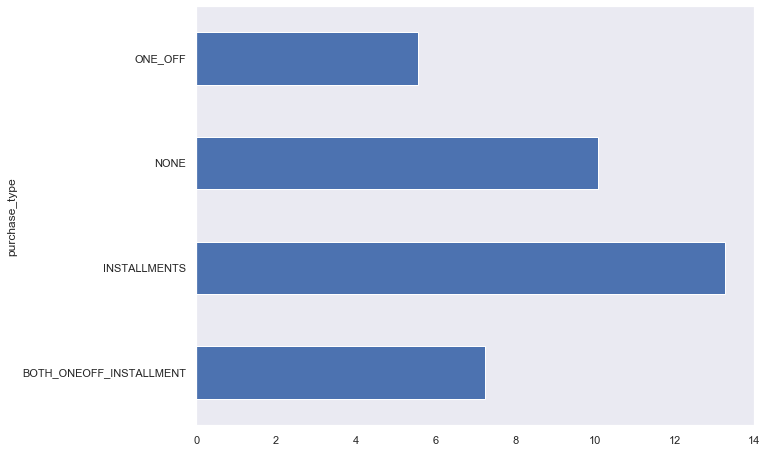

In [31]:
KPI = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
KPI.plot.barh()

Text(0, 0.5, 'Purchase_by_type')

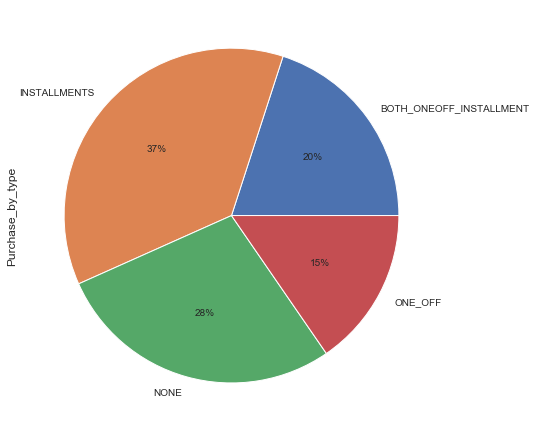

In [32]:
KPI.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Purchase_by_type')

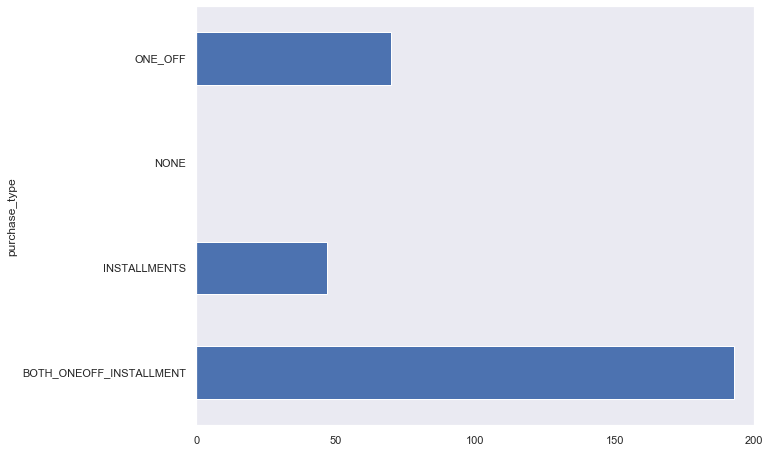

In [33]:
KPI2 = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_avg_purchase']))
KPI2.plot.barh()

Text(0, 0.5, 'Purchase_by_type')

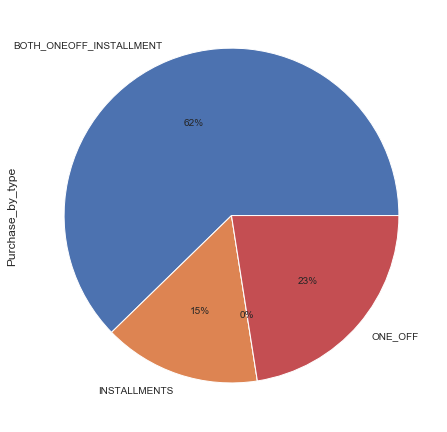

In [34]:
KPI2.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Purchase_by_type')

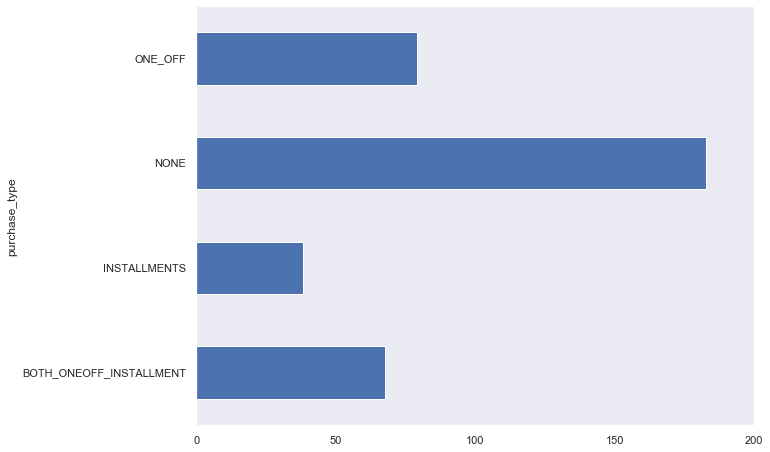

In [35]:
KPI3 = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance']))
KPI3.plot.barh()

Text(0, 0.5, 'Purchase_by_type')

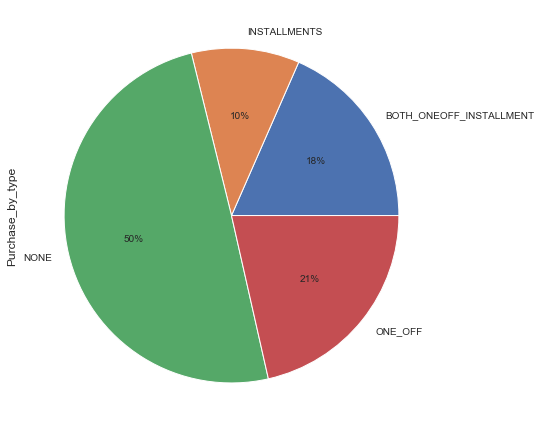

In [36]:
KPI3.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Purchase_by_type')

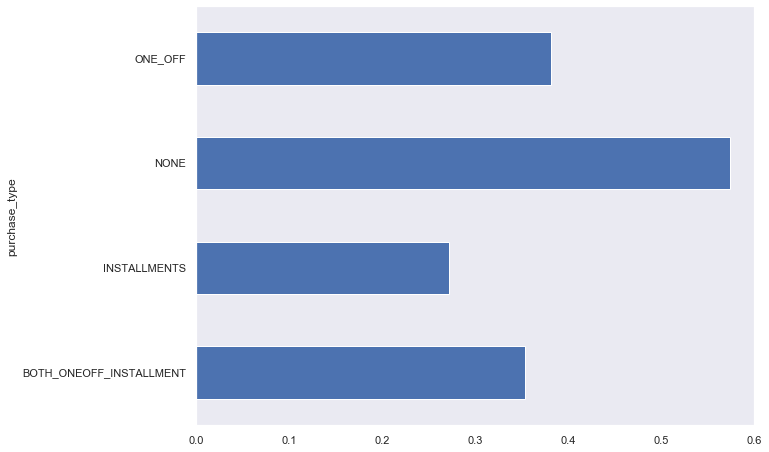

In [37]:
KPI4 = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage']))
KPI4.plot.barh()

Text(0, 0.5, 'Purchase_by_type')

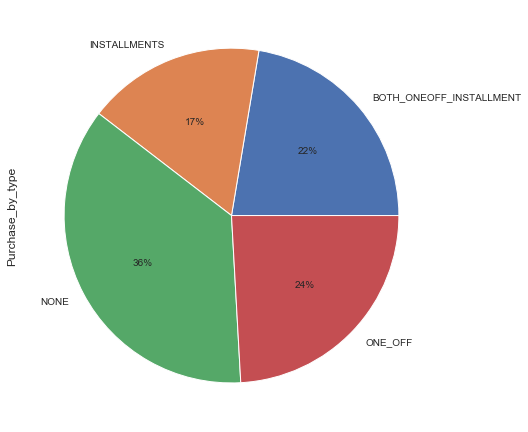

In [38]:
KPI4.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Purchase_by_type')

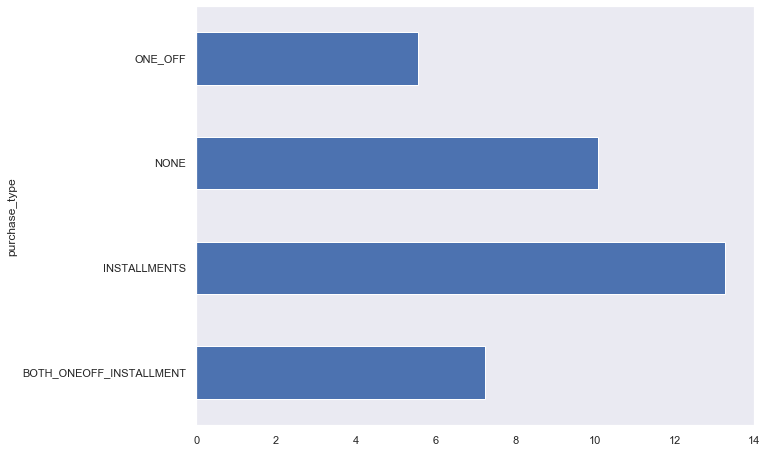

In [39]:
KPI5 = dataset.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
KPI5.plot.barh()

Text(0, 0.5, 'Purchase_by_type')

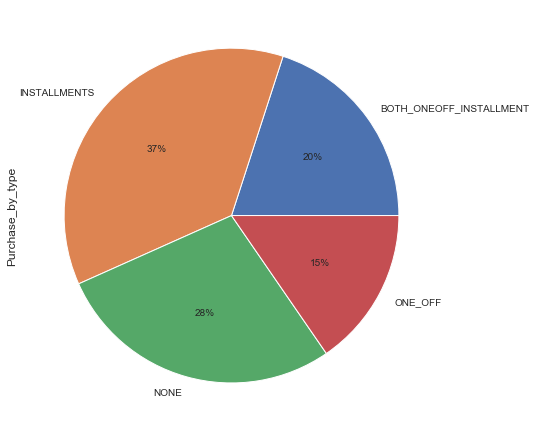

In [40]:
KPI5.plot.pie(autopct='%1.0f%%',fontsize=10, subplots='true')
plt.ylabel('Purchase_by_type')

###  <a>Dummy Variables

In [41]:
# Original dataset with categorical column converted to number type.
df_original=pd.concat([dataset,pd.get_dummies(dataset['purchase_type'])],axis=1)

In [42]:
# creating dummy variables of 'Purchase_type' variable for model building-

# creating Dummies for categorical variable
df_pre['purchase_type']=dataset.loc[:,'purchase_type']
pd.get_dummies(df_pre['purchase_type']).head(10)

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BOTH_ONEOFF_INSTALLMENT,INSTALLMENTS,NONE,ONE_OFF
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,0,1


#### Consoildating the final table

In [43]:
df_dummy=pd.concat([df_pre,pd.get_dummies(df_pre['purchase_type'])],axis=1)

df_dummy=df_dummy.drop('purchase_type',axis=1)
df_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
BOTH_ONEOFF_INSTALLMENT             0
INSTALLMENTS                        0
NONE                                0
ONE_OFF                             0
dtype: int64

In [44]:
# Correlation matrix
cor=df_dummy.corr()
cor

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,BOTH_ONEOFF_INSTALLMENT,INSTALLMENTS,NONE,ONE_OFF
BALANCE_FREQUENCY,1.000000,0.140170,0.110565,0.211533,0.199116,0.162279,0.195083,0.191347,0.197594,0.136531,0.153342,0.452728,-0.153431,0.191432,-0.134614,0.011506,-0.085719
ONEOFF_PURCHASES,0.140170,1.000000,0.161434,0.394093,0.813939,0.097157,-0.128787,-0.144803,0.574393,0.712306,-0.182491,-0.063248,0.236777,0.661126,-0.573717,-0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110565,0.161434,1.000000,0.804211,0.191380,0.905443,-0.310150,-0.335621,0.782683,0.687568,-0.377479,-0.217678,0.185773,0.607277,0.448744,-0.591238,-0.559631
PURCHASES_FREQUENCY,0.211533,0.394093,0.804211,1.000000,0.503478,0.856976,-0.345902,-0.382579,0.921860,0.817176,-0.433554,-0.233402,0.196350,0.521602,0.309931,-0.708043,-0.193552
ONEOFF_PURCHASES_FREQUENCY,0.199116,0.813939,0.191380,0.503478,1.000000,0.143362,-0.123254,-0.145991,0.621698,0.624414,-0.178300,-0.081121,0.259541,0.556323,-0.425733,-0.398242,0.232995
PURCHASES_INSTALLMENTS_FREQUENCY,0.162279,0.097157,0.905443,0.856976,0.143362,1.000000,-0.290847,-0.315215,0.769837,0.613901,-0.354226,-0.191502,0.141581,0.486777,0.446637,-0.520723,-0.493143
CASH_ADVANCE_FREQUENCY,0.195083,-0.128787,-0.310150,-0.345902,-0.123254,-0.290847,1.000000,0.936469,-0.327403,-0.341238,0.826931,0.433359,-0.131028,-0.104110,-0.253079,0.403820,-0.027924
CASH_ADVANCE_TRX,0.191347,-0.144803,-0.335621,-0.382579,-0.145991,-0.315215,0.936469,1.000000,-0.357895,-0.378010,0.902805,0.467613,-0.146743,-0.109572,-0.279532,0.448072,-0.039111
PURCHASES_TRX,0.197594,0.574393,0.782683,0.921860,0.621698,0.769837,-0.327403,-0.357895,1.000000,0.899851,-0.414205,-0.194377,0.237105,0.620589,0.161920,-0.749516,-0.105244
Monthly_avg_purchase,0.136531,0.712306,0.687568,0.817176,0.624414,0.613901,-0.341238,-0.378010,0.899851,1.000000,-0.426933,-0.223503,0.290643,0.573881,0.089251,-0.828244,0.106641


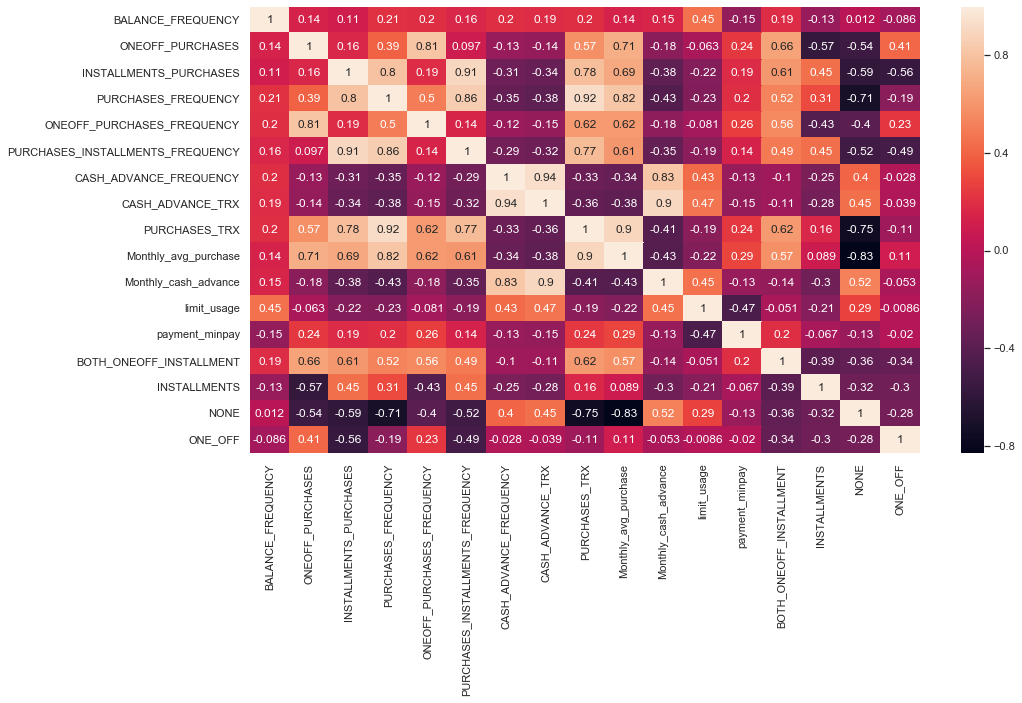

In [45]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.heatmap(cor,annot=True,ax=ax)  # Heat map

#### <a>Standardising The Data

In [46]:
# Standardization is scaling features to lie between a given minimum and maximum value, often between zero and one.

from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

### Scaling of data in such a way that all the variables and their values lie within a similar range.
### (z=Variable value-Mean/Standard Deviation)

df_scaled=sc.fit_transform(df_dummy)

#### <a>Applying PCA : Principal Component Analysis

In [47]:
# PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, 
# for noise filtering, for feature extraction and engineering, and much more.

In [51]:
from sklearn.decomposition import PCA

var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [52]:
pc=PCA(n_components=5)

In [53]:
p=pc.fit(df_scaled)

In [54]:
print(df_scaled.shape)
print('**************************************************************')
print(p.explained_variance_)

(8950, 17)
**************************************************************
[6.83574755 3.07030693 2.50427698 1.38746289 1.1138166 ]


In [55]:
var_ratio

{4: 0.811544276235126,
 5: 0.8770555795291427,
 6: 0.9186492443512614,
 7: 0.9410925256030122,
 8: 0.9616114053683056,
 9: 0.9739787081990644,
 10: 0.9835896584630712,
 11: 0.9897248107341957,
 12: 0.9927550009135232,
 13: 0.9953907562385429,
 14: 0.9979616898169597}

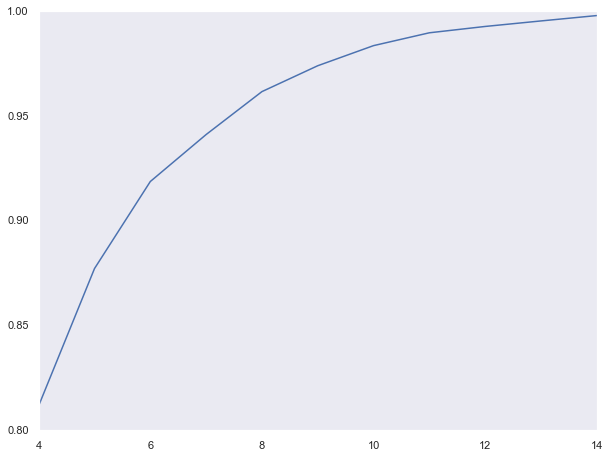

In [56]:
pd.Series(var_ratio).plot()

> Since, 5 components explain 87.7% of the data. Hence, we will select those 5 components.

In [57]:
# Applying n_components as 5 because 5 components explains 87.7 % of the data

pc_final=PCA(n_components=5).fit(df_scaled)

reduced_df=pc_final.fit_transform(df_scaled)


In [58]:
dd=pd.DataFrame(reduced_df)

In [59]:
df_dummy.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'BOTH_ONEOFF_INSTALLMENT', 'INSTALLMENTS', 'NONE', 'ONE_OFF'],
      dtype='object')

In [60]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=df_dummy.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [61]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

In [62]:
type(df_pca)

sklearn.decomposition._pca.PCA

#### <a>Clustering

#### Finding behaviour with 4 cluster.

In [63]:
# Improting required libraries for clustering
from sklearn.cluster import KMeans

km_4=KMeans(n_clusters=4,random_state=42)
km_4.fit(reduced_df)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [64]:
pd.Series(km_4.labels_).value_counts()

2    2758
0    2228
1    2090
3    1874
dtype: int64

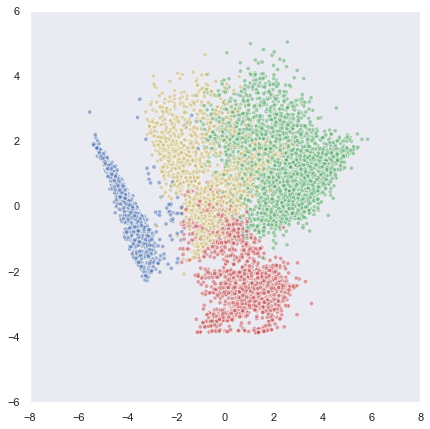

In [65]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [66]:
df_pair_plot=pd.DataFrame(reduced_df,columns=['PC_' +str(i) for i in range(5)])

In [67]:
df_pair_plot['Cluster']=km_4.labels_

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


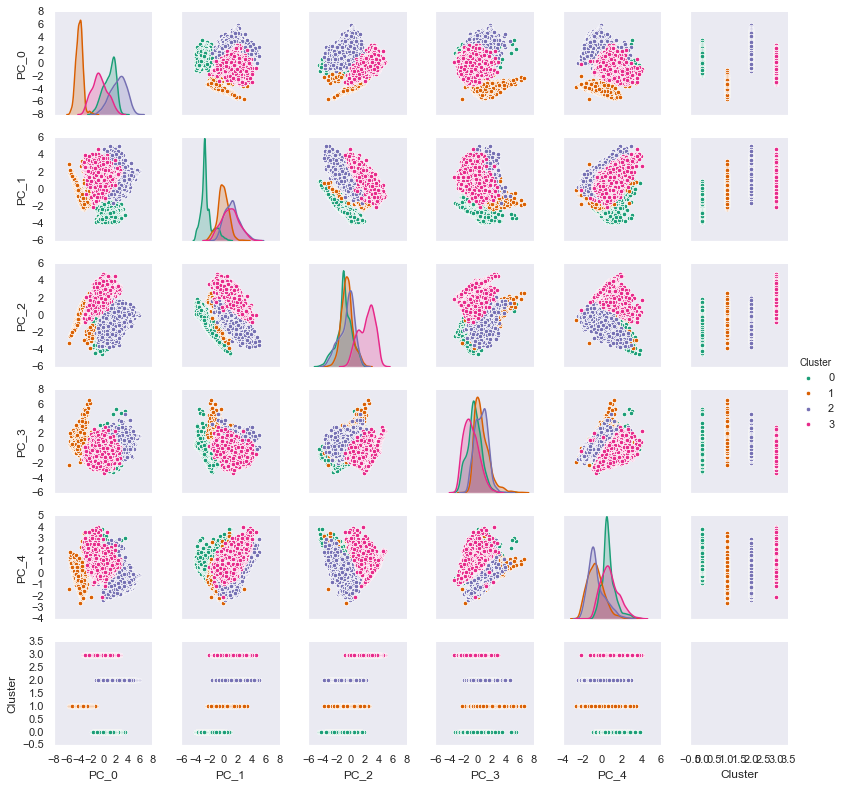

In [68]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

#### It shows that first two components are  more able to indentify clusters

In [69]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','BOTH_ONEOFF_INSTALLMENT', 'INSTALLMENTS', 'NONE', 'ONE_OFF','CREDIT_LIMIT']

In [70]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([df_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [71]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T 
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,12.053860,0.045933,33.125453,7.118997
Monthly_avg_purchase,47.573598,0.159337,193.696083,69.758276
Monthly_cash_advance,33.489846,186.298043,67.620006,77.843485
limit_usage,0.264275,0.576217,0.354487,0.378727
CASH_ADVANCE_TRX,1.019300,6.552632,2.807107,2.864995
payment_minpay,13.402660,9.927979,7.268605,5.561421
BOTH_ONEOFF_INSTALLMENT,0.001795,0.002392,1.000000,0.003735
INSTALLMENTS,0.998205,0.017225,0.000000,0.000000
NONE,0.000000,0.977033,0.000000,0.000000
ONE_OFF,0.000000,0.003349,0.000000,0.996265


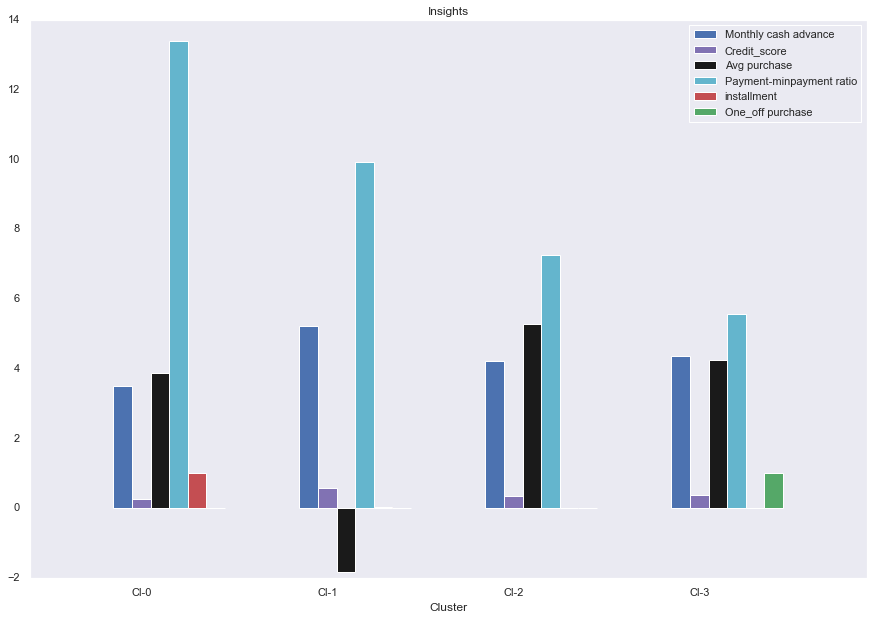

In [72]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['INSTALLMENTS',:].values
one_off=cluster_4.loc['ONE_OFF',:].values



bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

### <a>Insights

##### Clusters are clearly distinguishing behavior within customers

In [73]:
# Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI)

In [74]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print(s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print("Cluster -4 ",'\n')
print(pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4   
0          0    2228
1          1    2090
2          2    2758
3          3    1874
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2228   24.893855
1  2090   23.351955
2  2758   30.815642
3  1874   20.938547 



#### Finding behaviour with 5 Clusters:

In [75]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_df)
km_5.labels_

array([4, 1, 2, ..., 4, 1, 2])

In [76]:
pd.Series(km_5.labels_).value_counts()

4    2130
1    2084
0    1985
2    1860
3     891
dtype: int64

Text(0, 0.5, 'PC_1')

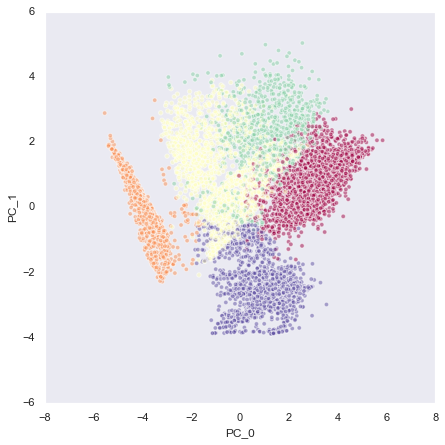

In [77]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [90]:
# Not as much distintively defining the clustering as compare to 4 clusters.

In [78]:
cluster_df_5=pd.concat([df_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [79]:
# Finding Mean of features for each cluster
five_cluster=cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T
five_cluster

Cluster_5,0,1,2,3,4
PURCHASES_TRX,34.538035,0.035509,7.067742,27.536476,11.896714
Monthly_avg_purchase,209.814279,0.096572,68.685725,141.648931,47.239695
Monthly_cash_advance,3.996969,185.109488,73.635703,252.400192,19.154845
limit_usage,0.262694,0.576260,0.377563,0.594982,0.246825
CASH_ADVANCE_TRX,0.152645,6.454894,2.648387,10.519641,0.480282
payment_minpay,8.569707,9.950170,5.540102,3.920172,13.866212
BOTH_ONEOFF_INSTALLMENT,1.000000,0.000000,0.003226,0.878788,0.000000
INSTALLMENTS,0.000000,0.016795,0.000000,0.106622,1.000000
NONE,0.000000,0.979846,0.000000,0.000000,0.000000
ONE_OFF,0.000000,0.003359,0.996774,0.014590,0.000000


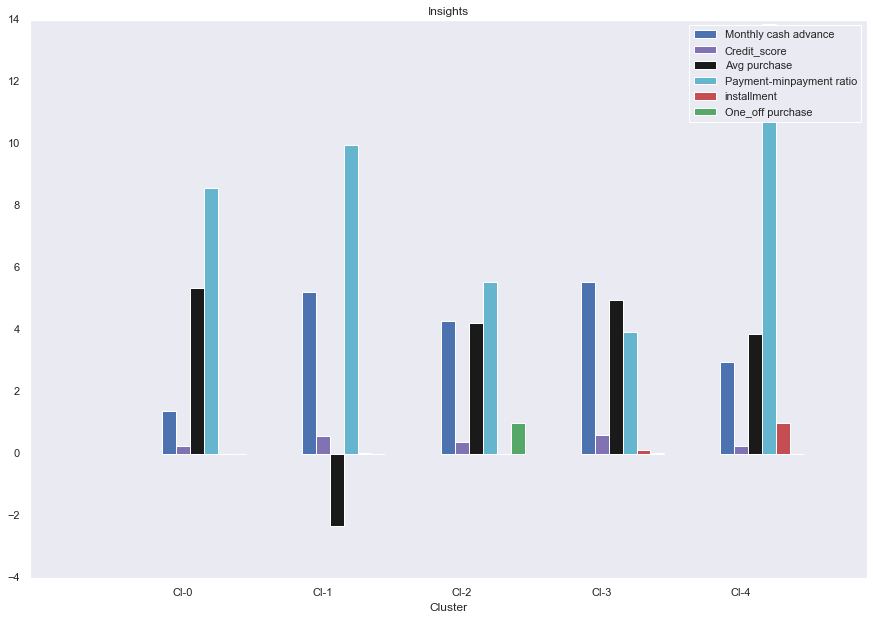

In [80]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(five_cluster.columns))

cash_advance=np.log(five_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(five_cluster.loc['limit_usage',:].values)
purchase= np.log(five_cluster.loc['Monthly_avg_purchase',:].values)
payment=five_cluster.loc['payment_minpay',:].values
installment=five_cluster.loc['INSTALLMENTS',].values
one_off=five_cluster.loc['ONE_OFF',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))

plt.legend()

>#### With 5 clusters :
#Cluster 0 having highest average purchases but there is Cluster 3 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same. 

#Cluster 0 and Cluster 3 are behaving similar in terms of Credit_limit and have cash transactions is on higher side. -->

#### So we don't have quite distinguishable characteristics within 5 clusters as compare to 4 clusters. 

In [81]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print('\n',s1)


 Cluster_5   
0          0    1985
1          1    2084
2          2    1860
3          3     891
4          4    2130
Name: Cluster_5, dtype: int64


In [82]:
# percentage of each cluster


print("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
print(pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1))

Cluster-5 

   Size  Percentage
0  1985   22.178771
1  2084   23.284916
2  1860   20.782123
3   891    9.955307
4  2130   23.798883


#### Finding behavior with 6 clusters

In [83]:
km_6=KMeans(n_clusters=6).fit(reduced_df)
km_6.labels_

array([2, 1, 3, ..., 2, 1, 4])

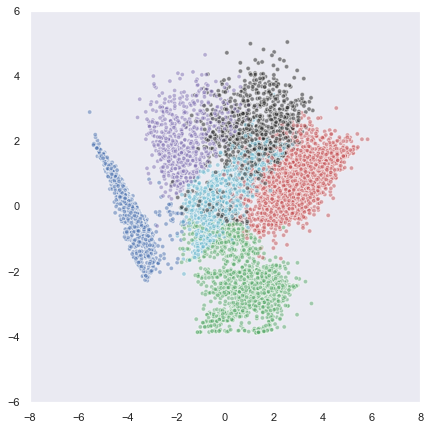

In [84]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [85]:
cluster_df_6=pd.concat([df_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [86]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,34.653320,0.033205,11.896762,7.744735,5.975645,27.742922
Monthly_avg_purchase,210.512330,0.098395,47.243825,78.395143,54.158471,140.643565
Monthly_cash_advance,3.942946,184.912834,19.155048,3.698390,205.903803,243.934772
limit_usage,0.262170,0.575884,0.246733,0.244966,0.607337,0.595784
CASH_ADVANCE_TRX,0.149012,6.435034,0.484280,0.133109,7.650430,10.057758
payment_minpay,8.610468,9.967837,13.861937,6.890777,3.254852,3.835641
BOTH_ONEOFF_INSTALLMENT,1.000000,0.000000,0.000000,0.009267,0.000000,0.894677
INSTALLMENTS,0.000000,0.017324,1.000000,0.000000,0.000000,0.105323
NONE,0.000000,0.982676,0.000000,0.000000,0.000000,0.000000
ONE_OFF,0.000000,0.000000,0.000000,0.990733,1.000000,0.000000


#### Insights with 6 clusters-
#Here also groups are overlapping.
#Cl-3 and Cl-4 behavior are same.

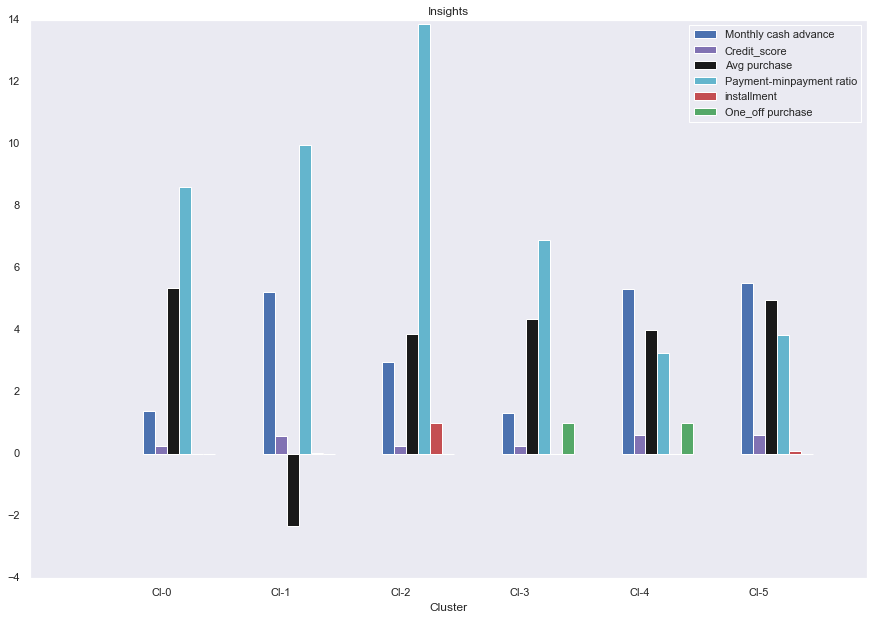

In [87]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['INSTALLMENTS',].values
one_off=six_cluster.loc['ONE_OFF',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [88]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([1.37192804, 5.21988454, 2.95256629, 1.30789754, 5.32740908,
       5.49690086])

In [89]:
# Insights with 6 clusters¶
# Here also groups are overlapping .
# # Cl-3 and Cl-4 behaving same

### <a>Checking performance metrics for Kmeans
##### I am validating performance with 2 metrics Calinski harabaz and Silhouette score

In [0]:
from sklearn.metrics import calinski_harabasz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_df)
    score_c[n]=calinski_harabasz_score(reduced_df,km_score.labels_)
    score[n]=silhouette_score(reduced_df,km_score.labels_)

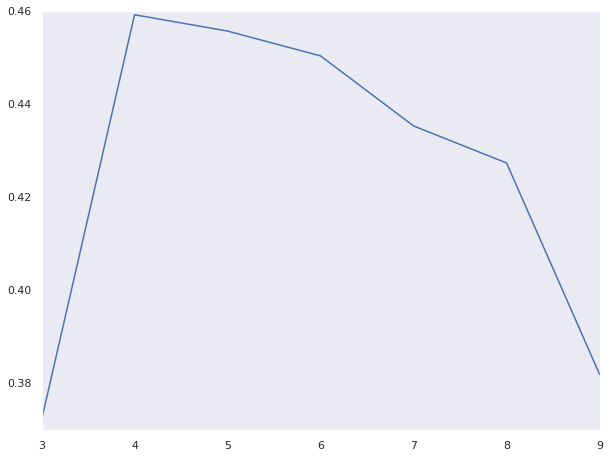

In [104]:
pd.Series(score).plot()

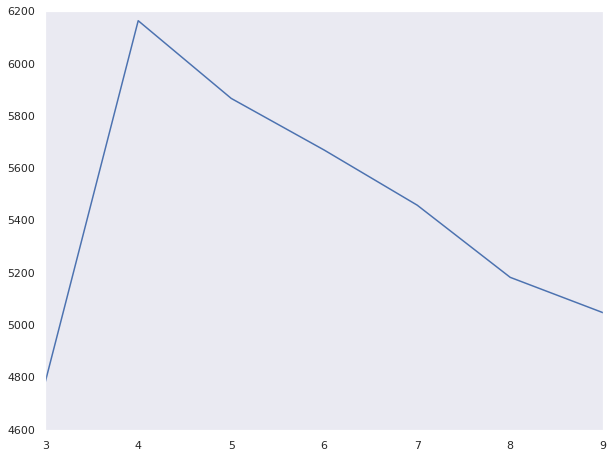

In [105]:
pd.Series(score_c).plot()

##### Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.

#### Marketing Strategy Suggested:
#### a. Group 2
#They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) 
#we can increase credit limit or can lower down interest rate . Can be given premium card /loyality cards to increase transactions
##### b. Group 1
#They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase 
#transaction
##### c. Group 3
#This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). 
#This group seems to be risky group.
##### d. Group 0
#This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. 
#Giving rewards point will make them perform more purchases.

***********************************************************END***************************************************************